# cctpy 入门

cctpy 是一个基于单线模型进行 CCT 磁场计算、束线建模、粒子跟踪、模型优化的程序，带有类似 transport 的书写语法，极易上手使用。下面就一个具体使用实例，介绍 cctpy 的使用方法。

## AGCCT 超导机架

<img src="./img/A12超导机架.jpg" width=60%></img>

上图所示的是一个带有交变梯度 CCT 的超导机架\[1\]，它由前后两个对称的束线段组成，红色元件是 AGCCT，蓝色元件是 QS 磁铁。

<div><small><i>Qin B , Zhao R , Liu X , et al. Comparison of beam optics for normal conducting and superconducting gantry beamlines applied to proton therapy[J]. International Journal of Modern Physics A, 2019, 34(36):1942015.</i></small></div>

cctpy 的核心是 ##Beamline## 类，它表示一条束线，构建束线的方式就是不断地在 ##Beamline## 对象尾部接上新的元件（漂移段、CCT、QS）。

为了参数化建模，首先我们定义参数。

In [1]:
MM = 0.001 # 定义 1 毫米

#------------------ 前偏转段 ---------------#
# 漂移段
DL1 = 0.8001322
GAP1 = 0.1765959
GAP2 = 0.2960518
# qs 磁铁
qs1_length = 0.2997797
qs1_aperture_radius = 30 * MM
qs1_gradient = 28.33
qs1_second_gradient = -140.44 * 2.0
qs2_length = 0.2585548
qs2_aperture_radius = 30 * MM
qs2_gradient = -12.12
qs2_second_gradient = 316.22 * 2.0
# cct 偏转半径
cct12_big_r = 0.95
# cct 孔径
agcct12_inner_small_r = 35 * MM
agcct12_outer_small_r = 35 * MM
dicct12_inner_small_r = 35 * MM
dicct12_outer_small_r = 35 * MM
# cct 匝数
agcct1_winding_number = 30
agcct2_winding_number = 39
dicct12_winding_number = 71
# cct 角度
dicct12_bending_angle = 22.5
agcct1_bending_angle = 9.782608695652174
agcct2_bending_angle = 12.717391304347826
# cct 倾斜角（倾角 90 度表示不倾斜）
dicct12_tilt_angles = [30, 80]
agcct12_tilt_angles = [90, 30]
# cct 电流
dicct12_current = -6192
agcct12_current = -3319
#------------------ 后偏转段 ---------------#
# 漂移段
DL2 = 2.1162209
GAP3 = 0.1978111
# qs 磁铁
qs3_length = 0.2382791
qs3_aperture_radius = 60 * MM
qs3_gradient = -7.3733
qs3_second_gradient = -45.31 * 2
# cct 偏转半径
cct345_big_r = 0.95
# cct 孔径
agcct345_inner_small_r = 83 * MM
agcct345_outer_small_r = 83 * MM + 15 * MM
dicct345_inner_small_r = 83 * MM + 15 * MM * 2
dicct345_outer_small_r = 83 * MM + 15 * MM * 3
# cct 匝数
agcct3_winding_number = 21
agcct4_winding_number = 50
agcct5_winding_number = 50
dicct345_winding_number = 128
# cct 角度（负数表示顺时针偏转）
dicct345_bending_angle = -67.5
agcct3_bending_angle = -(8 + 3.716404)
agcct4_bending_angle = -(8 + 19.93897)
agcct5_bending_angle = -(8 + 19.844626)
# cct 倾斜角（倾角 90 度表示不倾斜）
dicct345_tilt_angles = [30, 80]
agcct345_tilt_angles = [90, 30]
# cct 电流
dicct345_current = 9664
agcct345_current = -6000

part_per_winding = 36

## 导入 cctpy

带入 cctpy 中最重要的 3 个类，Beamline 表示一段束线，P2 表示一个二维坐标点，Plot2 封装了 matplotlib，可用于绘制各种图象/数据。

In [2]:
from cctpy import Beamline, P2, Plot2

## 创建前偏转段

束线长度为4.149802255227576m


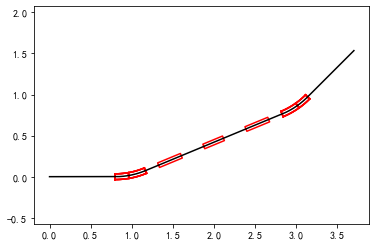

In [3]:
beamline = (
    Beamline.set_start_point(P2.origin()) # 设置束线的起点
    .first_drift(direct=P2.x_direct(), length=DL1) # 设置束线中第一个漂移段（束线必须以漂移段开始）
    .append_agcct( # 尾接 acgcct
        big_r=cct12_big_r, # 偏转半径
        # 二极 CCT 和四极 CCT 孔径
        small_rs=[dicct12_outer_small_r,dicct12_inner_small_r,agcct12_outer_small_r,agcct12_inner_small_r],
        bending_angles=[agcct1_bending_angle,agcct2_bending_angle], # agcct 每段偏转角度
        tilt_angles=[dicct12_tilt_angles,agcct12_tilt_angles], # 二极 CCT 和四极 CCT 倾斜角
        winding_numbers=[[dicct12_winding_number],[agcct1_winding_number,agcct2_winding_number]], # 二极 CCT 和四极 CCT 匝数
        currents=[dicct12_current,agcct12_current], # 二极 CCT 和四极 CCT 电流
        disperse_number_per_winding=part_per_winding # 每匝分段数目
    )
    .append_drift(GAP1) # 尾接漂移段
    .append_qs(  # 尾接 QS 磁铁
        length=qs1_length,
        gradient=qs1_gradient,
        second_gradient=qs1_second_gradient,
        aperture_radius=qs1_aperture_radius
    )
    .append_drift(GAP2)
    .append_qs(
        length=qs2_length,
        gradient=qs2_gradient,
        second_gradient=qs2_second_gradient,
        aperture_radius=qs2_aperture_radius
    )
    .append_drift(GAP2)
    .append_qs(
        length=qs1_length,
        gradient=qs1_gradient,
        second_gradient=qs1_second_gradient,
        aperture_radius=qs1_aperture_radius
    )
    .append_drift(GAP1)
    .append_agcct(
        big_r=cct12_big_r,
        small_rs=[dicct12_outer_small_r,dicct12_inner_small_r,agcct12_outer_small_r,agcct12_inner_small_r],
        bending_angles=[agcct2_bending_angle,agcct1_bending_angle],
        tilt_angles=[dicct12_tilt_angles,agcct12_tilt_angles],
        winding_numbers=[[dicct12_winding_number],[agcct2_winding_number,agcct1_winding_number]],
        currents=[dicct12_current,agcct12_current],
        disperse_number_per_winding=part_per_winding
    )
    .append_drift(DL1)
)

# 束线长度
beamline_length_part1 = beamline.get_length()
print(f"束线长度为{beamline_length_part1}m")

# 绘图
Plot2.equal()
Plot2.plot(beamline)

## 接上后偏转段

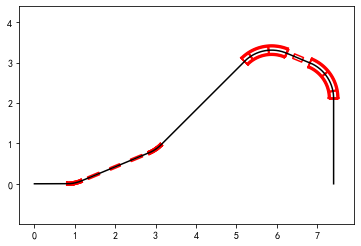

In [4]:
beamline = (
    beamline.append_drift(DL2)
    .append_agcct(
            big_r=cct345_big_r,
            small_rs=[dicct345_outer_small_r,dicct345_inner_small_r,agcct345_outer_small_r,agcct345_inner_small_r],
            bending_angles=[agcct3_bending_angle,agcct4_bending_angle,agcct5_bending_angle],
            tilt_angles=[dicct345_tilt_angles,agcct345_tilt_angles],
            winding_numbers=[[dicct345_winding_number], [agcct3_winding_number,agcct4_winding_number,agcct5_winding_number]],
            currents=[dicct345_current,agcct345_current],
            disperse_number_per_winding=part_per_winding
    )
    .append_drift(GAP3)
    .append_qs(
        length=qs3_length,
        gradient=qs3_gradient,
        second_gradient=qs3_second_gradient,
        aperture_radius=qs3_aperture_radius
    )
    .append_drift(GAP3)
    .append_agcct(
            big_r=cct345_big_r,
            small_rs=[dicct345_outer_small_r,dicct345_inner_small_r,agcct345_outer_small_r,agcct345_inner_small_r],
            bending_angles=[agcct5_bending_angle,agcct4_bending_angle,agcct3_bending_angle],
            tilt_angles=[dicct345_tilt_angles,agcct345_tilt_angles],
            winding_numbers=[[dicct345_winding_number], [agcct5_winding_number,agcct4_winding_number,agcct3_winding_number]],
            currents=[dicct345_current,agcct345_current],
            disperse_number_per_winding=part_per_winding
    )
    .append_drift(DL2)
)

Plot2.equal()
Plot2.plot(beamline)

## 定义束流，并进行粒子跟踪，绘制相椭圆

因为束线前段参数未定，仅进行后段的粒子跟踪

track 6 particles
▇▇▇▇▇▇ finish
track 6 particles
▇▇▇▇▇▇ finish


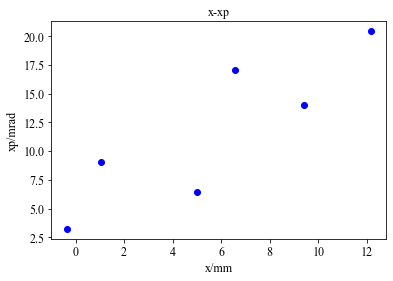

In [5]:
# 设置束流参数，并进行粒子跟踪
x,y = beamline.track_phase_ellipse(
    x_sigma_mm=3.5,
    xp_sigma_mrad=7.5,
    y_sigma_mm=3.5,
    yp_sigma_mrad=7.5,
    delta=0.0,
    particle_number=6, # 粒子数目
    kinetic_MeV=215,
    s=beamline_length_part1, # 束流起点，设为 beamline_length_part1，即后偏转段的起点
    footstep=5*MM # 粒子运动步长
)

Plot2.info(x_label='x/mm',y_label='xp/mrad',title='x-xp')
Plot2.plot(x,describe='bo')

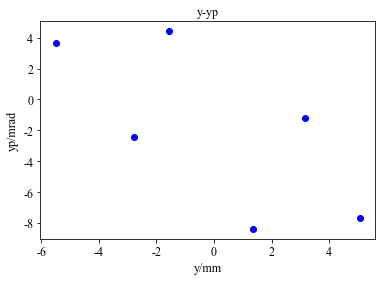

In [6]:
Plot2.info(x_label='y/mm',y_label='yp/mrad',title='y-yp')
Plot2.plot(y,describe='bo')

## 查看磁场分布

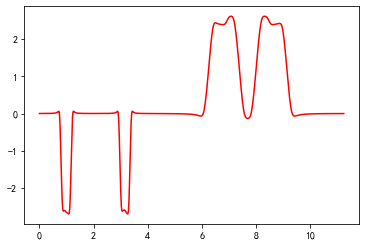

In [7]:
b = beamline.magnetic_field_bz_along(step=20*MM)
Plot2.plot(b,describe='r-')
